# **Importing Libraries**

In [ ]:
# !pip install seaborn

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 22})

import seaborn as sns

## Reading Data

This data set is comprised of **four sub data sets**: **KDDTest+**, **KDDTest-21**,** KDDTrain+**, **KDDTrain+_20Percent**, although **KDDTest-21** and **KDDTrain+_20Percent are subsets of the KDDTrain+ and KDDTest+**. From now on, **KDDTrain+ will be referred to as train** and **KDDTest+ will be referred to as test**. The **KDDTest-21 is a subset of test, without the most difficult traffic records (Score of 21)**, and the **KDDTrain+_20Percent is a subset of train**, whose record count makes up** 20% of the entire train dataset**. That being said, the traffic records that exist in the KDDTest-21 and KDDTrain+_20Percent are already in test and train respectively and aren’t new records held out of either dataset.

These data sets contain the **records of the internet traffic** seen by a simple intrusion detection network and are the ghosts of the traffic encountered by a real IDS and just the traces of its existence remains. The data set contains **43 features** per record, with **41 of the features referring to the traffic input** itself and the **last two are labels** (whether it is a normal or attack) and **Score** (the severity of the traffic input itself).

In [2]:
train = 'dataset/KDD_DATA.txt'


In [3]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

flag=['OTH','RSTOS0','SF','SH','RSTO','S2','S1','REJ','S3','RSTR','S0']

protocol_type=['tcp','udp','icmp']

service=['http','smtp','finger','domain_u','auth','telnet','ftp','eco_i','ntp_u','ecr_i','other','private','pop_3','ftp_data',
                  'rje','time','mtp','link','remote_job','gopher','ssh','name','whois','domain','login','imap4','daytime','ctf','nntp',
                  'shell','IRC','nnsp','http_443','exec','printer','efs','courier','uucp','klogin','kshell','echo','discard','systat',
                  'supdup','iso_tsap','hostnames','csnet_ns','pop_2','sunrpc','uucp_path','netbios_ns','netbios_ssn','netbios_dgm',
                  'sql_net','vmnet','bgp','Z39_50','ldap','netstat','urh_i','X11','urp_i','pm_dump','tftp_u','tim_i','red_i','icmp',
                  'http_2784','harvest','aol','http_8001']

binary_attack=['normal','ipsweep', 'nmap', 'portsweep','satan', 'saint', 'mscan','back', 'land', 'neptune', 'pod', 'smurf',
               'teardrop', 'apache2', 'udpstorm', 'processtable','mailbomb','buffer_overflow', 'loadmodule', 'perl', 'rootkit',
               'xterm', 'ps', 'sqlattack','ftp_write', 'guess_passwd', 'imap', 'multihop','phf', 'spy', 'warezclient',
               'warezmaster','snmpgetattack','named', 'xlock', 'xsnoop','sendmail', 'httptunnel', 'worm', 'snmpguess']

multiclass_attack={ 'normal': 'normal',
        'probe': ['ipsweep.', 'nmap.', 'portsweep.','satan.', 'saint.', 'mscan.'],
        'dos': ['back.', 'land.', 'neptune.', 'pod.', 'smurf.','teardrop.', 'apache2.', 'udpstorm.', 'processtable.','mailbomb.'],
        'u2r': ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.','xterm.', 'ps.', 'sqlattack.'],
        'r2l': ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.','phf.', 'spy.', 'warezclient.', 'warezmaster.','snmpgetattack.',
                   'named.', 'xlock.', 'xsnoop.','sendmail.', 'httptunnel.', 'worm.', 'snmpguess.']}  

In [4]:
train_data=pd.read_csv(train,names=feature)


In [5]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.0,0.00,0.00,neptune,20
148513,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.0,0.00,0.00,normal,21
148514,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.0,0.01,0.00,normal,18
148515,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.0,0.00,0.00,neptune,20


In [6]:
# remove attribute 'difficulty_level'
train_data.drop(['difficulty'],axis=1,inplace=True)
train_data.shape

(148517, 42)

## Data Type Checking and Statistical Reports

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

In [8]:
# number of attack labels 
train_data['label'].value_counts()

label
normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
multihop              25
land                  25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
ftp_write             11
loadmodule            11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
worm                   2
sqlattack              2
udpstorm               2
spy                

In [9]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)



In [10]:
change_label(train_data)

C:\Users\iamsa\AppData\Local\Temp\ipykernel_8624\2296698969.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)


In [11]:
# distribution of attack classes
train_data.label.value_counts()

label
normal    77054
Dos       53387
Probe     14077
R2L        3880
U2R         119
Name: count, dtype: int64

In [15]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,Dos
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,Dos
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,Probe
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,Probe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.0,0.00,0.00,Dos
148513,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.0,0.00,0.00,normal
148514,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.0,0.01,0.00,normal
148515,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.0,0.00,0.00,Dos


In [41]:
train_data.duration.unique()

array([    0,     2,     1, ...,  5430, 11680,   679], dtype=int64)

In [42]:
train_data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [16]:


# This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
train_data.drop('num_root', axis = 1, inplace = True)

# This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
train_data.drop('srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
train_data.drop('srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
train_data.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
train_data.drop('dst_host_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
train_data.drop('dst_host_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
train_data.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
train_data.drop('dst_host_same_srv_rate', axis = 1, inplace = True)



In [17]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1.0,0.04,0.06,0.00,255,10,0.06,0.00,0.00,Dos
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1.0,0.01,0.06,0.00,255,1,0.06,0.00,0.00,Dos
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.0,1.00,0.00,0.00,134,86,0.04,0.61,0.02,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.0,1.00,0.00,1.00,3,57,0.00,1.00,0.28,Probe
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,1.0,1.00,0.00,0.75,29,86,0.17,0.03,0.02,Probe


In [18]:
len(train_data.columns)

34

In [19]:

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
train_data.drop('srv_diff_host_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
train_data.drop('dst_host_count', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
train_data.drop('dst_host_srv_count', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
train_data.drop('dst_host_diff_srv_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
train_data.drop('dst_host_same_src_port_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
train_data.drop('dst_host_srv_diff_host_rate', axis = 1, inplace = True)









In [20]:
from sklearn import preprocessing
lable_encoder = preprocessing.LabelEncoder()

In [21]:
def encoder(col,final_df):
    print('Processing',col)
    lable_encoder.fit(final_df[col])
    final_df[col]=lable_encoder.transform(final_df[col])

    le_name_mapping = dict(zip(lable_encoder.classes_, lable_encoder.transform(lable_encoder.classes_)))
    print(le_name_mapping)
    return final_df

In [22]:
train_data = encoder('protocol_type',train_data)

Processing protocol_type
{'icmp': 0, 'tcp': 1, 'udp': 2}


In [23]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,label
0,0,1,private,REJ,0,0,0,0,0,0,...,0,0,0,229,10,0.0,1.0,0.04,0.06,Dos
1,0,1,private,REJ,0,0,0,0,0,0,...,0,0,0,136,1,0.0,1.0,0.01,0.06,Dos
2,2,1,ftp_data,SF,12983,0,0,0,0,0,...,0,0,0,1,1,0.0,0.0,1.00,0.00,normal
3,0,0,eco_i,SF,20,0,0,0,0,0,...,0,0,0,1,65,0.0,0.0,1.00,0.00,Probe
4,1,1,telnet,RSTO,0,15,0,0,0,0,...,0,0,0,1,8,0.0,1.0,1.00,0.00,Probe


In [24]:
train_data = encoder('service',train_data)

Processing service
{'IRC': 0, 'X11': 1, 'Z39_50': 2, 'aol': 3, 'auth': 4, 'bgp': 5, 'courier': 6, 'csnet_ns': 7, 'ctf': 8, 'daytime': 9, 'discard': 10, 'domain': 11, 'domain_u': 12, 'echo': 13, 'eco_i': 14, 'ecr_i': 15, 'efs': 16, 'exec': 17, 'finger': 18, 'ftp': 19, 'ftp_data': 20, 'gopher': 21, 'harvest': 22, 'hostnames': 23, 'http': 24, 'http_2784': 25, 'http_443': 26, 'http_8001': 27, 'imap4': 28, 'iso_tsap': 29, 'klogin': 30, 'kshell': 31, 'ldap': 32, 'link': 33, 'login': 34, 'mtp': 35, 'name': 36, 'netbios_dgm': 37, 'netbios_ns': 38, 'netbios_ssn': 39, 'netstat': 40, 'nnsp': 41, 'nntp': 42, 'ntp_u': 43, 'other': 44, 'pm_dump': 45, 'pop_2': 46, 'pop_3': 47, 'printer': 48, 'private': 49, 'red_i': 50, 'remote_job': 51, 'rje': 52, 'shell': 53, 'smtp': 54, 'sql_net': 55, 'ssh': 56, 'sunrpc': 57, 'supdup': 58, 'systat': 59, 'telnet': 60, 'tftp_u': 61, 'tim_i': 62, 'time': 63, 'urh_i': 64, 'urp_i': 65, 'uucp': 66, 'uucp_path': 67, 'vmnet': 68, 'whois': 69}


In [25]:
for i, j in {'OTH': 0, 'REJ': 1, 'RSTO': 2, 'RSTOS0': 3, 'RSTR': 4, 'S0': 5, 'S1': 6, 'S2': 7, 'S3': 8, 'SF': 9, 'SH': 10}.items():
    print('<option value="'+str(j)+'">'+i.upper()+'</option>')

<option value="0">OTH</option>
<option value="1">REJ</option>
<option value="2">RSTO</option>
<option value="3">RSTOS0</option>
<option value="4">RSTR</option>
<option value="5">S0</option>
<option value="6">S1</option>
<option value="7">S2</option>
<option value="8">S3</option>
<option value="9">SF</option>
<option value="10">SH</option>


In [26]:
train_data = encoder('flag',train_data)

Processing flag
{'OTH': 0, 'REJ': 1, 'RSTO': 2, 'RSTOS0': 3, 'RSTR': 4, 'S0': 5, 'S1': 6, 'S2': 7, 'S3': 8, 'SF': 9, 'SH': 10}


In [27]:
train_data = encoder('label',train_data)

Processing label
{'Dos': 0, 'Probe': 1, 'R2L': 2, 'U2R': 3, 'normal': 4}


In [28]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,label
0,0,1,49,1,0,0,0,0,0,0,...,0,0,0,229,10,0.0,1.0,0.04,0.06,0
1,0,1,49,1,0,0,0,0,0,0,...,0,0,0,136,1,0.0,1.0,0.01,0.06,0
2,2,1,20,9,12983,0,0,0,0,0,...,0,0,0,1,1,0.0,0.0,1.00,0.00,4
3,0,0,14,9,20,0,0,0,0,0,...,0,0,0,1,65,0.0,0.0,1.00,0.00,1
4,1,1,60,2,0,15,0,0,0,0,...,0,0,0,1,8,0.0,1.0,1.00,0.00,1


In [29]:
import pandas as pd
import numpy as np
import os

# Assuming you already have a DataFrame named train_data
# This code will generate sample CSVs from it

def generate_sample_csvs(df, label_column, output_dir='sample_csvs'):    
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Get unique labels
    unique_labels = df[label_column].unique()
    
    # Generate separate CSV for each label (10 rows each)
    for label in unique_labels:
        # Get rows with this label
        label_data = df[df[label_column] == label]
        
        # Take 10 rows (or all if less than 10)
        sample_size = min(10, len(label_data))
        sample_data = label_data.sample(sample_size, random_state=42)
        
        # Save to CSV
        filename = f"{output_dir}/class_{label}_samples.csv"
        sample_data.to_csv(filename, index=False)
        print(f"Created {filename} with {sample_size} rows")
    
    # Generate 3 CSVs with random label distributions
    for i in range(3):
        # Random sample with mixed labels
        random_sample = df.sample(10, random_state=i*10)
        
        # Save to CSV
        filename = f"{output_dir}/random_distribution_{i+1}.csv"
        random_sample.to_csv(filename, index=False)
        print(f"Created {filename} with {len(random_sample)} rows")

# Example usage:
# Assuming 'train_data' is your DataFrame and 'label' is your label column
try:
    # Generate sample CSVs
    generate_sample_csvs(train_data, 'label', 'output_samples')
    print("Successfully generated all sample CSV files!")
except NameError:
    print("ERROR: 'train_data' DataFrame not found. Make sure it's defined before running this script.")
    

Created output_samples/class_0_samples.csv with 10 rows
Created output_samples/class_4_samples.csv with 10 rows
Created output_samples/class_1_samples.csv with 10 rows
Created output_samples/class_2_samples.csv with 10 rows
Created output_samples/class_3_samples.csv with 10 rows
Created output_samples/random_distribution_1.csv with 10 rows
Created output_samples/random_distribution_2.csv with 10 rows
Created output_samples/random_distribution_3.csv with 10 rows
Successfully generated all sample CSV files!


In [60]:
y = train_data.label
x = train_data.drop(labels=['label'],axis=1)

In [61]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(103961, 27)
(103961,)
(44556, 27)
(44556,)


In [62]:
y

0         0
1         0
2         4
3         1
4         1
         ..
148512    0
148513    4
148514    4
148515    0
148516    4
Name: label, Length: 148517, dtype: int32

In [85]:
x

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate
0,0,1,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,1.0,0.04,0.06
1,0,1,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,1.0,0.01,0.06
2,2,1,20,9,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.00,0.00
3,0,0,14,9,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.0,1.00,0.00
4,1,1,60,2,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,1.0,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,0.0,0.14,0.06
148513,8,2,49,9,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00
148514,0,1,54,9,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.00,0.00
148515,0,1,30,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,0.0,0.06,0.05


In [84]:
pd.set_option('display.max_columns', None)


In [64]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss,roc_auc_score,accuracy_score,confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [82]:
x.iloc(1)

# KNN Algorithm

In [65]:
for i in range(1,5):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_val)
  y_predict = knn.predict_proba(x_val)

  print('\n*******')
  print("C : ",i)
  print("Log_Loss: ",log_loss(y_val,y_predict))
  print("Accuracy_Score: ",accuracy_score(y_val,y_pred))
  print('*******\n')


*******
C :  1
Log_Loss:  0.3387522507535723
Accuracy_Score:  0.9901921177843612
*******


*******
C :  2
Log_Loss:  0.24237426173927057
Accuracy_Score:  0.987880420145435
*******


*******
C :  3
Log_Loss:  0.19600649402834638
Accuracy_Score:  0.9892045964628782
*******


*******
C :  4
Log_Loss:  0.16958867744018877
Accuracy_Score:  0.9876335398150642
*******



# Gaussian Naive Bayes

In [66]:

from sklearn.naive_bayes import GaussianNB  

clfg = GaussianNB()
clfg.fit(x_train, y_train.values.ravel())
y_test_pred = clfg.predict(x_val)
print("Accuracy_Score: ",accuracy_score(y_val,y_test_pred))


Accuracy_Score:  0.42113295627973785


# Decision Tree

In [67]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
  
clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
clfd.fit(x_train, y_train.values.ravel())
y_test_pred = clfd.predict(x_val)
print("Accuracy_Score: ",accuracy_score(y_val,y_test_pred))


Accuracy_Score:  0.9481551306221384


# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
  
clfr = RandomForestClassifier(n_estimators = 30)
clfr.fit(x_train, y_train.values.ravel())
y_test_pred = clfr.predict(x_val)
print("Accuracy_Score: ",accuracy_score(y_val,y_test_pred))


Accuracy_Score:  0.994501301732651


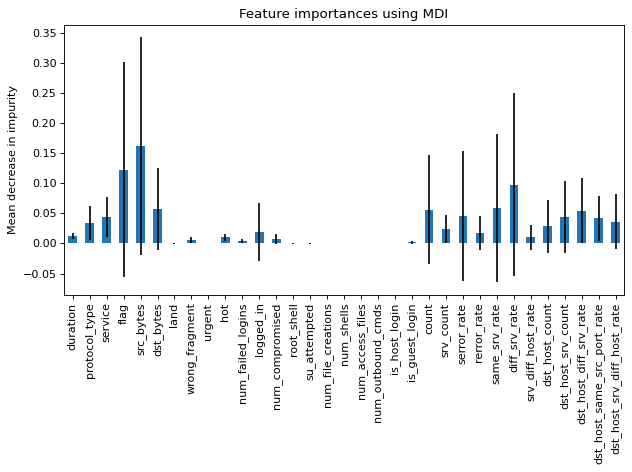

In [68]:
import time
import numpy as np
feature_names = x.columns


start_time = time.time()
importances = clfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in clfr.estimators_], axis=0)
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# LogisticRegression

In [79]:
from sklearn.linear_model import LogisticRegression
  
clfl = LogisticRegression(max_iter = 1200000)
clfl.fit(x_train, y_train.values.ravel())
y_test_pred = clfl.predict(x_val)
print("Accuracy_Score: ",accuracy_score(y_val,y_test_pred))


Accuracy_Score:  0.7944160158003412


In [81]:
for i in x.columns:
    print("'\\n"+i+":',",i,end=',')

'\nduration:', duration,'\nprotocol_type:', protocol_type,'\nservice:', service,'\nflag:', flag,'\nsrc_bytes:', src_bytes,'\ndst_bytes:', dst_bytes,'\nland:', land,'\nwrong_fragment:', wrong_fragment,'\nurgent:', urgent,'\nhot:', hot,'\nnum_failed_logins:', num_failed_logins,'\nlogged_in:', logged_in,'\nnum_compromised:', num_compromised,'\nroot_shell:', root_shell,'\nsu_attempted:', su_attempted,'\nnum_file_creations:', num_file_creations,'\nnum_shells:', num_shells,'\nnum_access_files:', num_access_files,'\nnum_outbound_cmds:', num_outbound_cmds,'\nis_host_login:', is_host_login,'\nis_guest_login:', is_guest_login,'\ncount:', count,'\nsrv_count:', srv_count,'\nserror_rate:', serror_rate,'\nrerror_rate:', rerror_rate,'\nsame_srv_rate:', same_srv_rate,'\ndiff_srv_rate:', diff_srv_rate,

In [73]:
for i in x.columns:
    print(i,' = request.form["'+i+'"]')

duration  = request.form["duration"]
protocol_type  = request.form["protocol_type"]
service  = request.form["service"]
flag  = request.form["flag"]
src_bytes  = request.form["src_bytes"]
dst_bytes  = request.form["dst_bytes"]
land  = request.form["land"]
wrong_fragment  = request.form["wrong_fragment"]
urgent  = request.form["urgent"]
hot  = request.form["hot"]
num_failed_logins  = request.form["num_failed_logins"]
logged_in  = request.form["logged_in"]
num_compromised  = request.form["num_compromised"]
root_shell  = request.form["root_shell"]
su_attempted  = request.form["su_attempted"]
num_file_creations  = request.form["num_file_creations"]
num_shells  = request.form["num_shells"]
num_access_files  = request.form["num_access_files"]
num_outbound_cmds  = request.form["num_outbound_cmds"]
is_host_login  = request.form["is_host_login"]
is_guest_login  = request.form["is_guest_login"]
count  = request.form["count"]
srv_count  = request.form["srv_count"]
serror_rate  = request.form["serr

In [71]:
for i in x.columns:
    print('input_data.append(int('+i+'))')

input_data.append(int(duration))
input_data.append(int(protocol_type))
input_data.append(int(service))
input_data.append(int(flag))
input_data.append(int(src_bytes))
input_data.append(int(dst_bytes))
input_data.append(int(land))
input_data.append(int(wrong_fragment))
input_data.append(int(urgent))
input_data.append(int(hot))
input_data.append(int(num_failed_logins))
input_data.append(int(logged_in))
input_data.append(int(num_compromised))
input_data.append(int(root_shell))
input_data.append(int(su_attempted))
input_data.append(int(num_file_creations))
input_data.append(int(num_shells))
input_data.append(int(num_access_files))
input_data.append(int(num_outbound_cmds))
input_data.append(int(is_host_login))
input_data.append(int(is_guest_login))
input_data.append(int(count))
input_data.append(int(srv_count))
input_data.append(int(serror_rate))
input_data.append(int(rerror_rate))
input_data.append(int(same_srv_rate))
input_data.append(int(diff_srv_rate))


In [72]:
len(x.columns)

27

In [69]:
## Saving Random Forest Model
import pickle
pickle.dump(clfr, open('rf_classifier.pkl', 'wb'))
pickle.dump(knn, open('knn_classifier.pkl', 'wb'))
pickle.dump(clfd, open('dt_classifier.pkl', 'wb'))


In [82]:
loaded_model = pickle.load(open('rf_classifier.pkl', 'rb'))


In [83]:
# {'Dos': 0, 'Probe': 1, 'R2L': 2, 'U2R': 3, 'normal': 4}
def decode(output):
    if output ==0:
        return 'Dos Attack'
    elif output ==1:
        return 'Probe Attack'
    elif output ==3:
        return 'R2L Attack'
    elif output ==4:
        return 'U2R Attack'
    elif output ==5:
        return 'Normal Attack'

In [88]:
x_train['duration'].unique()

array([    0,     2,  1524, ...,  5083,   437, 27201], dtype=int64)

In [90]:
while True:
    print("\n************************************************************")
    input_data = []
    for col in x_train.columns:
        input_data.append(int(input("Select "+col+" "+str(x_train['duration'].unique())+": ")))
    
    print("\n**************** RESULT *********************\n\n\n\n")
    print('RF_result = ',decode(loaded_model.predict([input_data])[0]))


************************************************************
Select duration [    0     2  1524 ...  5083   437 27201]: 2
Select protocol_type [    0     2  1524 ...  5083   437 27201]: 2
Select service [    0     2  1524 ...  5083   437 27201]: 1
Select flag [    0     2  1524 ...  5083   437 27201]: q


ValueError: invalid literal for int() with base 10: 'q'

In [100]:
x_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
126012,0,1,24,9,242,637,0,0,0,0,...,0.0,0.0,1.00,0.00,0.00,255,255,0.00,0.00,0.00
52823,0,1,24,9,229,315,0,0,0,0,...,0.0,0.0,1.00,0.00,0.38,255,255,0.00,0.00,0.00
90950,0,1,20,5,0,0,0,0,0,0,...,1.0,0.0,0.22,0.44,0.00,255,62,0.02,0.00,0.00
66147,0,1,24,9,230,585,0,0,0,0,...,0.0,0.0,1.00,0.00,0.00,65,255,0.00,0.02,0.02
133326,0,0,14,9,8,0,0,0,0,0,...,0.0,0.0,1.00,0.00,1.00,1,3,0.00,1.00,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114290,0,1,40,5,0,0,0,0,0,0,...,1.0,0.0,0.01,0.06,0.00,255,2,0.06,0.00,0.00
137121,0,1,24,9,318,2208,0,0,0,0,...,0.0,0.0,1.00,0.00,0.06,255,255,0.00,0.00,0.00
86805,0,1,24,1,0,0,0,0,0,0,...,0.0,0.5,1.00,0.00,0.00,12,187,0.00,0.08,0.21
35945,6,1,19,2,0,133,0,0,0,0,...,0.0,1.0,1.00,0.00,0.00,2,2,1.00,0.50,1.00


In [95]:
decode(loaded_model.predict([[2,2,1,20,9,12983,0,0,0,0,0,0.0,1.00,0.00,0.0,134,86,0.04,0.61,0.02]])[0])


ValueError: Number of features of the model must match the input. Model n_features is 33 and input n_features is 20 